In [28]:
!pip install mediapipe
import pandas as pd
import numpy as np
import cv2 as cv
import mediapipe as mp
from google.colab.patches import cv2_imshow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


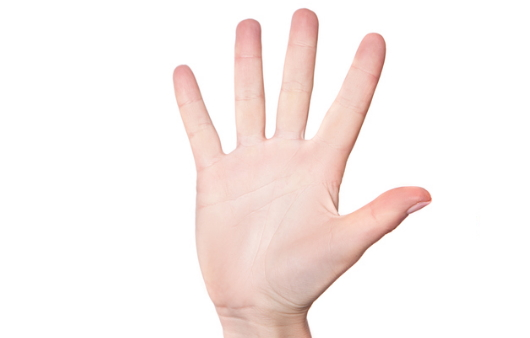

In [23]:
# 테스트 이미지를 코랩 파일에 넣고 테스트 해주세요

img = cv.imread('/content/hand.jpg')
cv2_imshow(img)

In [24]:
# 미디어 파이프에 맞게 이미지 변환
img = cv.flip(img, 1)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

In [25]:
# 제스쳐를 저장하기 위한 기본 구성
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
hands = mp_hands.Hands(
    max_num_hands=1,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5)

관절의 각도: [30.87, 0.33, 21.33, 5.52, 2.81, 2.66, 2.91, 3.22, 1.33, 3.07, 1.43, 3.3, 3.54, 3.94, 4.08]


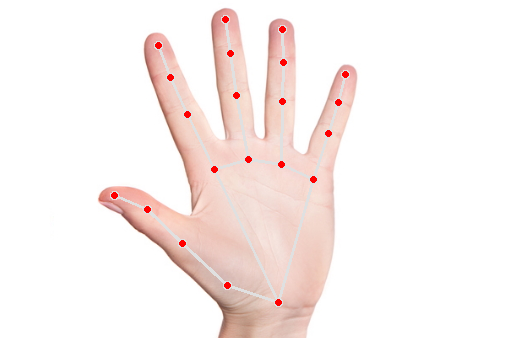

In [26]:
# 미디어 파이프에서 이미지 분석 결과를 받아오기
result = hands.process(img)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# 검출한 손들을 하나씩 확인 (여기서는 손은 하나만 검출함)
for res in result.multi_hand_landmarks:

    # 각각의 손가락(및 관절)의 위치를 저장
    joint = np.zeros((21, 3))
    for j, lm in enumerate(res.landmark):
        joint[j] = [lm.x, lm.y, lm.z]

    # 손가락 관절의 순서를 이용해 데이터를 계산하고 표준화
    v1 = joint[[0, 1, 2, 3, 0, 5, 6, 7, 0, 9, 10, 11, 0, 13, 14, 15, 0, 17, 18, 19], :]  # Parent joint
    v2 = joint[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], :]  # Child joint
    v = v2 - v1  # [20,3]
    v = v / np.linalg.norm(v, axis=1)[:, np.newaxis]

    # 손가락 관절의 각도를 피쳐로 만듦
    angle = np.arccos(np.einsum('nt,nt->n',
                                v[[0, 1, 2, 4, 5, 6, 8, 9, 10, 12, 13, 14, 16, 17, 18], :],
                                v[[1, 2, 3, 5, 6, 7, 9, 10, 11, 13, 14, 15, 17, 18, 19], :]))  # [15,]
    angle = np.degrees(angle)  # radian -> degree


    # 최종 데이터
    data = list(angle)

    # 화면에 사용자의 손 사진 저장
    mp_drawing.draw_landmarks(img, res, mp_hands.HAND_CONNECTIONS)


print(f'관절의 각도: {list(map(lambda x: round(x, 2), data))}')
cv2_imshow(img)

In [29]:
!pip freeze > requirement.txt